In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Datasets/housing.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
select_cols = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms", "population", "households", 
               "median_income", "median_house_value", "ocean_proximity"]

In [6]:
df = df[select_cols]

In [7]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [9]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [14]:
total_bedrooms_median = df.total_bedrooms.median()

In [15]:
df.total_bedrooms = df.total_bedrooms.fillna(total_bedrooms_median)

In [16]:
df.total_bedrooms.describe()

count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [61]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [62]:
y_full_train = np.log1p(df_full_train.median_house_value.values)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [63]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [64]:
from sklearn.feature_extraction import DictVectorizer

In [65]:
dv = DictVectorizer(sparse=False)

In [66]:
train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

In [67]:
val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [68]:
test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

# Question 1

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [70]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [71]:
from sklearn.tree import export_text

In [72]:
print(export_text(dt, feature_names = dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



### Answer: ocean_proximity=INLAND

# Question 2

In [74]:
from sklearn.ensemble import RandomForestRegressor

In [75]:
rf = RandomForestRegressor(n_estimators = 10,
                          random_state=1,
                          n_jobs=-1)

In [76]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [80]:
y_pred = rf.predict(X_val)

In [81]:
y_pred

array([12.79831433, 13.10693547, 11.19832125, ..., 12.7074498 ,
       12.33400139, 12.28102939])

In [78]:
from sklearn.metrics import mean_squared_error

In [82]:
rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)), 3)

In [83]:
rmse

0.247

### Answer: 0.25

# Question 3

In [88]:
scores = []
for n_estimators in np.arange(start=10, stop=200, step=10):
    rf = RandomForestRegressor(n_estimators = n_estimators,
                               random_state=1,
                               n_jobs=-1)  
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)), 3)
    scores.append((n_estimators, rmse))

In [89]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])
df_scores

,n_estimators,rmse
0,10,0.247
1,20,0.239
2,30,0.236
3,40,0.234
4,50,0.233
5,60,0.233
6,70,0.232
7,80,0.232
8,90,0.232
9,100,0.232


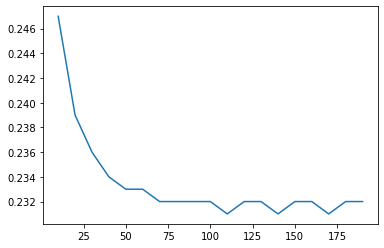

In [92]:
plt.plot(df_scores.n_estimators, df_scores.rmse)

### Answer: 70

# Question 4

In [94]:
scores = []
for max_depth in [10, 15, 20, 25]:
    for n_estimators in np.arange(start=10, stop=200, step=10):
        rf = RandomForestRegressor(n_estimators = n_estimators,
                                   max_depth = max_depth,
                                   random_state=1,
                                   n_jobs=-1)  
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        rmse = round(np.sqrt(mean_squared_error(y_val, y_pred)), 3)
        scores.append((max_depth, n_estimators, rmse))

In [95]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'n_estimators', 'rmse'])
df_scores.head()

,max_depth,n_estimators,rmse
0,10,10,0.255
1,10,20,0.253
2,10,30,0.251
3,10,40,0.251
4,10,50,0.250


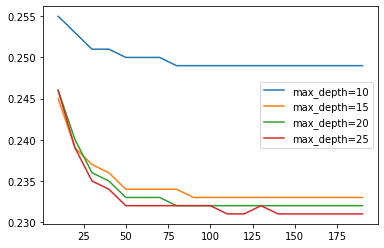

In [98]:
plt.figure()
for max_depth in [10, 15, 20, 25]:
    df_subset = df_scores[df_scores.max_depth == max_depth]
    plt.plot(df_subset.n_estimators, df_subset.rmse, label='max_depth=%d' % max_depth)

plt.legend()

### Answer: max_depth=20

# Question 5

In [102]:
rf = RandomForestRegressor(n_estimators = 10,
                           max_depth = 20,
                           random_state=1,
                           n_jobs=-1)  
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=10, n_jobs=-1, random_state=1)

In [104]:
rf.feature_importances_

array([1.64988409e-02, 3.25729602e-02, 1.01437967e-01, 9.65054278e-02,
       3.63212321e-01, 2.90678186e-03, 3.10964206e-01, 3.56894692e-04,
       3.84610622e-04, 4.27101514e-03, 2.95942864e-02, 1.96091132e-02,
       2.16855745e-02])

<BarContainer object of 13 artists>

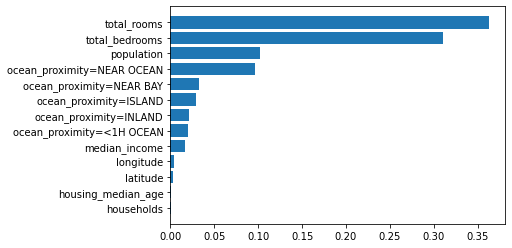

In [109]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(dv.get_feature_names(), rf.feature_importances_[sorted_idx])


### Answer: total_rooms

# Question 6

In [113]:
!pip install xgboost

In [114]:
import xgboost as xgb

In [129]:
features = dv.get_feature_names()

In [130]:
new_feature_names = []
for feature in features:
    if "=<" in feature:
        new_feature_name = feature.replace("=<", "_less_than_")
        new_feature_names.append(new_feature_name)
    elif "=" in feature:
        new_feature_name = feature.replace("=", "_equals_")
        new_feature_names.append(new_feature_name)
    else:
        new_feature_names.append(feature)

In [131]:
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [132]:
new_feature_names

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_less_than_1H OCEAN',
 'ocean_proximity_equals_INLAND',
 'ocean_proximity_equals_ISLAND',
 'ocean_proximity_equals_NEAR BAY',
 'ocean_proximity_equals_NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [133]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names = new_feature_names)
dval = xgb.DMatrix(X_val, label=y_val, feature_names = new_feature_names)

In [134]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [151]:
def parse_xgb_output(output):
    results = []
    for line in output.stdout.strip().split('\n'):
        num_iter, train_auc, val_auc = line.split('\t')
        num_iter = int(num_iter.strip('[]'))
        train_auc = float(train_auc.split(':')[1])
        val_auc = float(val_auc.split(':')[1])
        results.append((num_iter, train_auc, val_auc))
    return pd.DataFrame(results, columns=['num_iter', 'train_rmse', 'val_rmse'])

In [152]:
scores={}

In [157]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    'eval_metric': 'rmse',
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist)

In [158]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

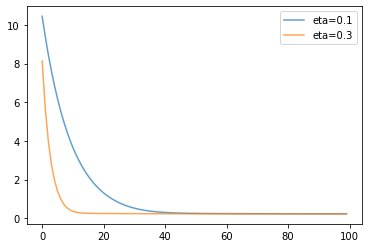

In [185]:
plt.figure()
for key in ['eta=0.1', 'eta=0.3']:
    df_scores=scores[key]
    plt.plot(df_scores.num_iter, df_scores.val_rmse, '-', alpha=0.7, label=key)
plt.legend()

In [ ]:
### Answer